In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the inverted pendulum system
def inverted_pendulum(t, x):
    g = 9.8
    l = 1
    m = 1
    M = 1

    d1 = M + m * (1 - np.cos(x[1])**2)
    d2 = l * d1

    F = 0  # No input

    dxdt = np.zeros(4)
    dxdt[0] = x[2]
    dxdt[1] = x[3]
    dxdt[2] = (F + m * l * x[3]**2 * np.sin(x[1]) - m * g * np.sin(x[1]) * np.cos(x[1])) / d1
    dxdt[3] = (-F * np.cos(x[1]) - m * l * x[3]**2 * np.sin(x[1]) * np.cos(x[1]) + (M + m) * g * np.sin(x[1])) / d2

    return dxdt



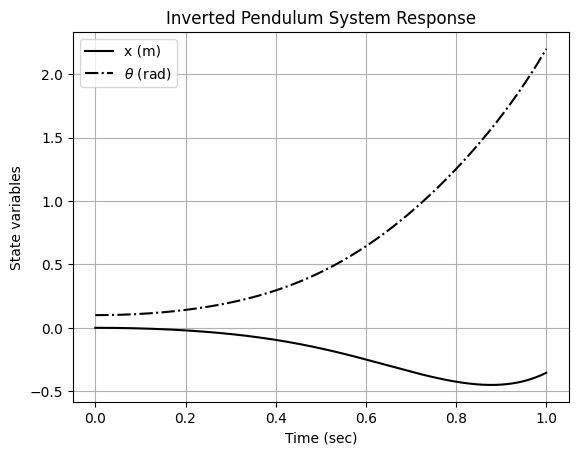

In [2]:
# Simulation parameters
t_span = (0, 1)

x0 = [0, 0.1, 0, 0]  # Initial state: [x; theta; v; omega]
# Solve the system
sol = solve_ivp(inverted_pendulum, t_span, x0,t_eval = np.linspace(0, 1, 1000), method='RK45')

# Plot the results
plt.figure()
plt.plot(sol.t, sol.y[0],'k', label = 'x (m)')
plt.plot(sol.t, sol.y[1], '-.k', label = r'$\theta$ (rad)')
plt.xlabel('Time (sec)')
plt.ylabel('State variables')
plt.legend()
plt.grid()
plt.title('Inverted Pendulum System Response')
plt.show()